In [1]:
import sys
sys.path.insert(1, './env')
sys.path.insert(1, './agents')

import gym
import pylab
import random
import strategy_imitation, sarsa, ddqn, random_agent, a2c, model_based,graph_ai
import aa_gun,jet_table_simple
import numpy as np
from collections import deque
import keras
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import pandas as pd
import pickle
import copy

In [2]:
#как сделать запись в файл? Перегони в картинку, её перегони в верный формат.

In [3]:
#(224, 224, 3) - размеры resnet101, resnet 101v2

In [4]:
black_square = np.zeros((224, 224, 3))

_____ 2020-08-07 21:09:24.781831
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               12900     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)        

KeyboardInterrupt: 

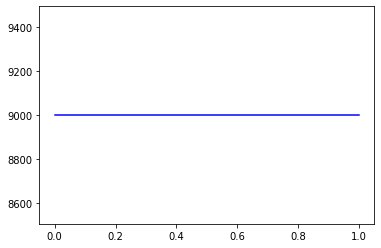

In [5]:
#Проверь на зенитке, на cartpole и на mountain car
EPISODES=1400

print('_____',pd.Timestamp.now())
#здесь весь код от инициализации модели до выдачи scores.
# In case of CartPole-v1, maximum length of episode is 500

#env = jet_table_simple.jet_table_simple_env()
#env = gym.make('Seaquest-ramNoFrameskip-v0')
env = gym.make('BattleZone-ram-v0')
#env=CartPoleEnv9()
#env = aa_gun.AA_gun_simple0_env()
# get size of state and action from environment
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

agent = sarsa.SarsaAgent(state_size, action_size)
#goal_state_list = [[100, 0, 0],[0, 0.1, -0.1],[2000, 0, 1]]
#agent = graph_ai.GraphAI(state_size, action_size, goal_state_list=goal_state_list)
agent.train_start=700
#agent.epsilon_decay=0.9999
agent.render=True

scores, episodes = [], []
reward_lst = []
s_list=[]
a_list=[]
movie = []
agent.epsilon = 1

t = 0
for e in range(EPISODES):
    done = False
    score = 0
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    

    while not done:
        t += 1
        if 1:
            #, screen_width=224, screen_height=224
            env.render(mode='human')
            #rgb = env.render(mode='rgb_array', screen_width=224, screen_height=224)
            rgb = env.render(mode='rgb_array')
            shp = np.shape(rgb)
            delta_x = int((224- shp[0])/2)
            delta_y = int((224- shp[1])/2)
            img = copy.copy(black_square)
            img[delta_x:delta_x+shp[0],delta_y:delta_y+shp[1],:] = rgb
            img = rgb

            movie.append(img)
            if len(movie)>1000:
                hsh = str(int(np.random.rand()*1e9))
                nam = f'battlezone_sarsa_{hsh}.pkl'
                with open('./movies_save_raw/'+nam, 'wb') as f:
                    pickle.dump(movie, f, protocol=pickle.HIGHEST_PROTOCOL)
                movie = []
                    

        # get action for the current state and go one step in environment)
        action = agent.get_action(state)
         
        next_state, reward, done, info = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        # if an action make the episode end, then gives penalty of -100
            

        # save the sample <s, a, r, s'> to the replay memory
        agent.append_sample(state, action, reward, next_state, done)
        #if next_state[0,11]!=reward:
        #    print('state[13]!=reward',state[0,11],reward)
        #
        s_list.append(state)
        a_list.append(action)
        reward_lst.append(reward)
        #

        # every time step do the training
        agent.train_model()
        score += reward
        state = next_state

        if done:
            # every episode update the target model to be same with model
            agent.update_target_model()

            # every episode, plot the play time
            scores.append(score)
            episodes.append(e)
            pylab.plot(episodes, scores, 'b')
            #pylab.savefig("./save_graph/aa_gun_dqn.png")

            print("episode:", e, "  score:", score,np.mean(scores), "  epsilon:", agent.epsilon, 't:', t)


In [ ]:
np.shape(env.render(mode='rgb_array'))

In [6]:
t

14288

In [7]:
len(movie)

274